In [93]:
# Import the pandas library and read and merge data from provided URLs using the common 'Mouse ID' column.
import pandas as pd
merged_df = pd.read_csv('https://raw.githubusercontent.com/GBov81/Module-5/main/Pymaceuticals/data/Mouse_metadata.csv')\
    .merge(pd.read_csv('https://raw.githubusercontent.com/GBov81/Module-5/main/Pymaceuticals/data/Study_results.csv'), on='Mouse ID')

# Display the number of unique mice IDs in the merged DataFrame.
print("Number of unique mice IDs in merged DataFrame:", merged_df['Mouse ID'].nunique())

# Check for mouse IDs with duplicate time points.
duplicate_mouse_ids = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID']

# Display the data associated with mouse IDs having duplicate time points.
print("Mouse IDs with duplicate time points:")
print(merged_df[merged_df['Mouse ID'].isin(duplicate_mouse_ids)])

# Create a new DataFrame with data removed for mouse IDs having duplicate time points.
cleaned_df = merged_df[~merged_df['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the updated number of unique mice IDs in the cleaned DataFrame.
print("Number of unique mice IDs in the cleaned DataFrame:", cleaned_df['Mouse ID'].nunique())

# Create the summary statistics DataFrame.
summary_stats_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for comprehension and clarity.
summary_stats_df = summary_stats_df.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume SD',
    'sem': 'Tumor Volume SEM'
})
# Display the summary statistics DataFrame.
print("Summary Statistics:")
print(summary_stats_df)

Number of unique mice IDs in merged DataFrame: 249
Mouse IDs with duplicate time points:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21  

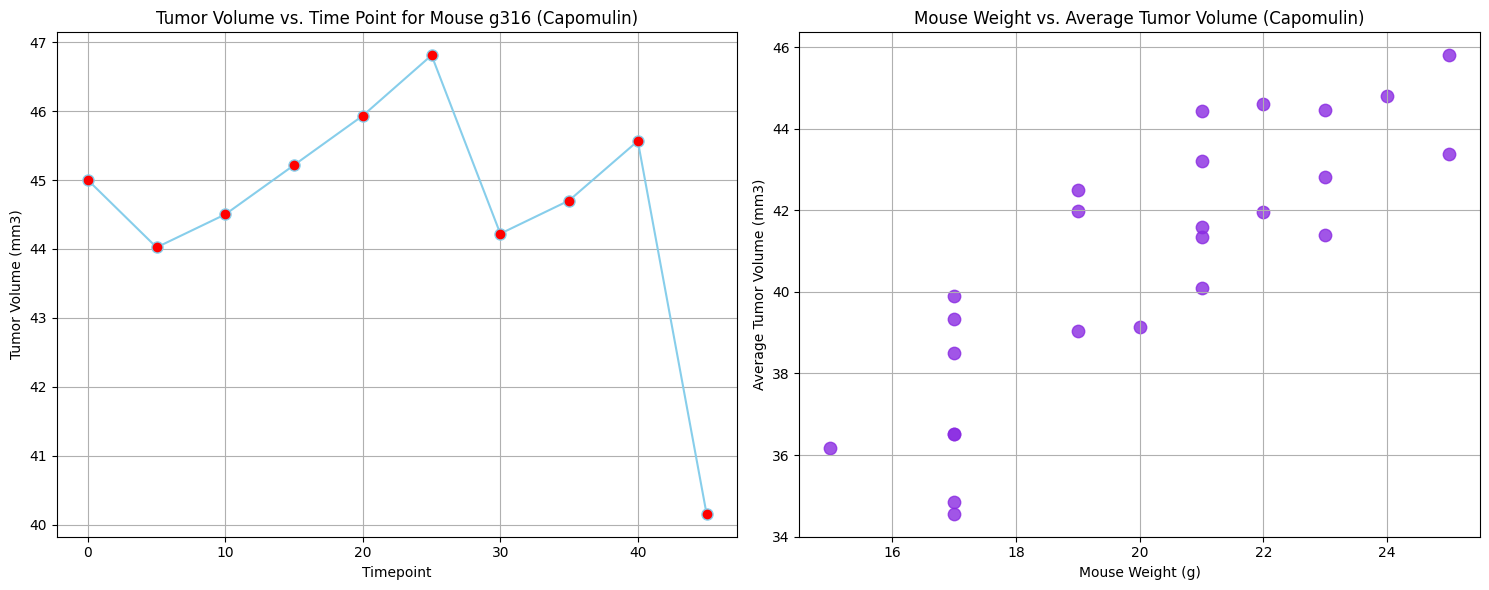

In [94]:
# Import the Matplotlib library for data visualization.
import matplotlib.pyplot as plt

# Filter data for the Capomulin treatment regimen.
capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Select a single mouse treated with Capomulin and create subplots for the line and scatter plots.
selected_mouse_id = 'g316'
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Line plot of tumor volume versus time point for the selected mouse.
single_mouse_data = capomulin_df[capomulin_df['Mouse ID'] == selected_mouse_id]
axes[0].plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], 'o-', color='skyblue', markersize=8, markerfacecolor='red')
axes[0].set(title=f'Tumor Volume vs. Time Point for Mouse {selected_mouse_id} (Capomulin)', xlabel='Timepoint', ylabel='Tumor Volume (mm3)')
axes[0].grid(True)

# Scatter plot of mouse weight versus average observed tumor volume for the Capomulin regimen.
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
axes[1].scatter(mouse_weight, average_tumor_volume, color='blueviolet', marker='o', s=80, alpha=0.8)
axes[1].set(title='Mouse Weight vs. Average Tumor Volume (Capomulin)', xlabel='Mouse Weight (g)', ylabel='Average Tumor Volume (mm3)')
axes[1].grid(True)

# Adjust spacing between subplots and display them.
plt.tight_layout()
plt.show()

